In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Load dataset
df = pd.read_csv("Instagram_data_batch_13.csv", encoding="latin1")



In [3]:
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [4]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


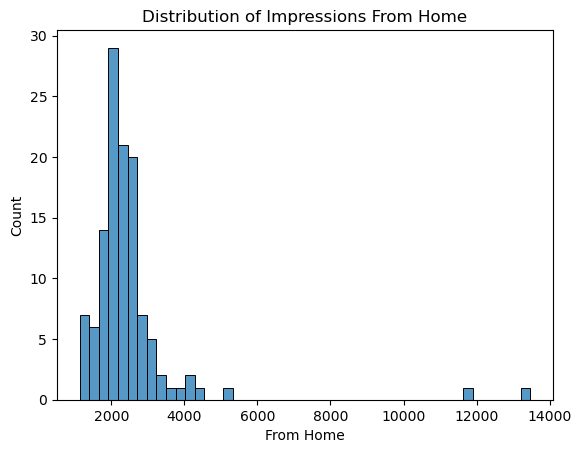

In [7]:
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'])
plt.show()

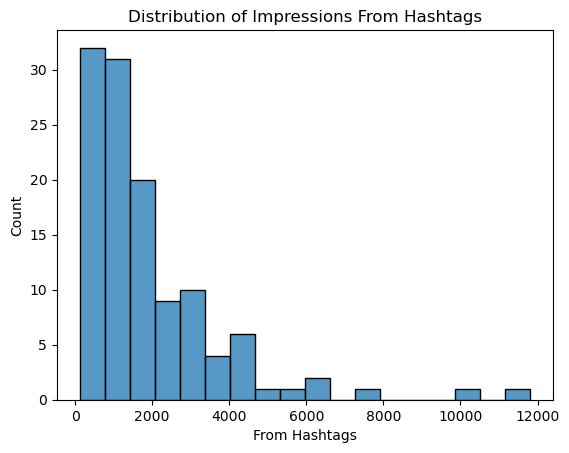

In [8]:
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'])
plt.show()

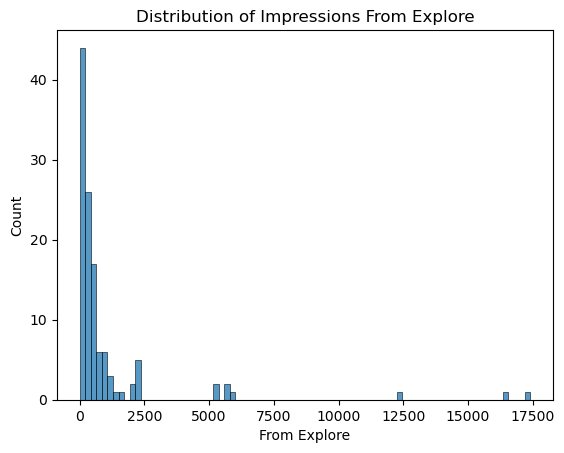

In [9]:
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'])
plt.show()

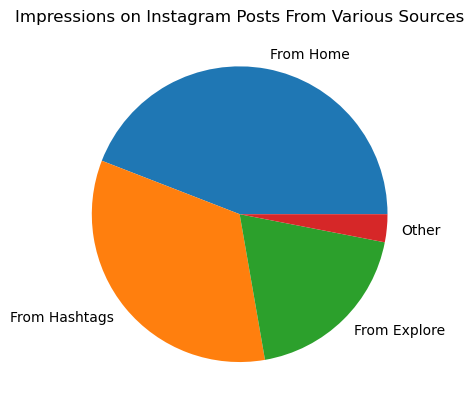

In [10]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
plt.pie(values, labels=labels)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.show()

In [11]:
lr = LinearRegression()

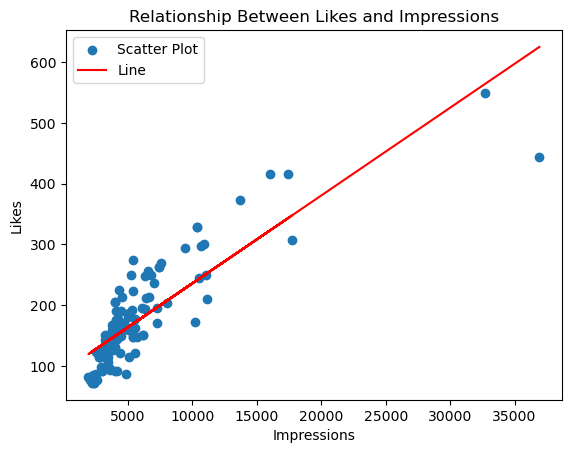

In [12]:
lr.fit(df[["Impressions"]], df["Likes"])
plt.scatter(df["Impressions"], df["Likes"], label="Scatter Plot")
plt.title("Relationship Between Likes and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Likes")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")
plt.legend()
plt.show()

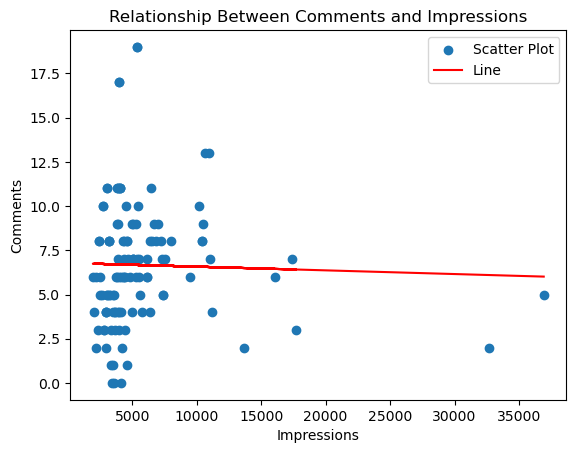

In [13]:
lr.fit(df[["Impressions"]], df["Comments"])
plt.scatter(df["Impressions"], df["Comments"], label="Scatter Plot")
plt.title("Relationship Between Comments and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Comments")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")

plt.legend()
plt.show()

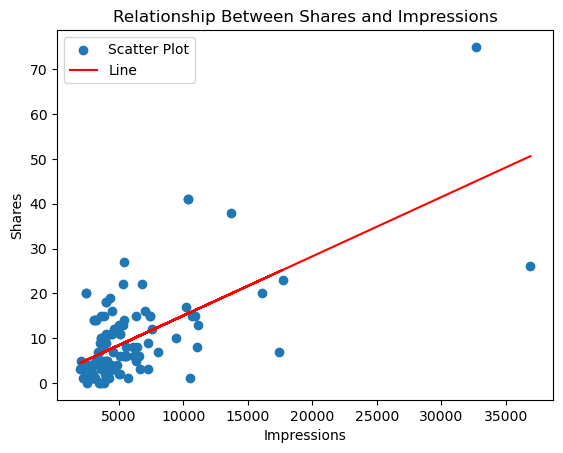

In [14]:
lr.fit(df[["Impressions"]], df["Shares"])
plt.scatter(df["Impressions"], df["Shares"], label="Scatter Plot")
plt.title("Relationship Between Shares and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Shares")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")

plt.legend()
plt.show()

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


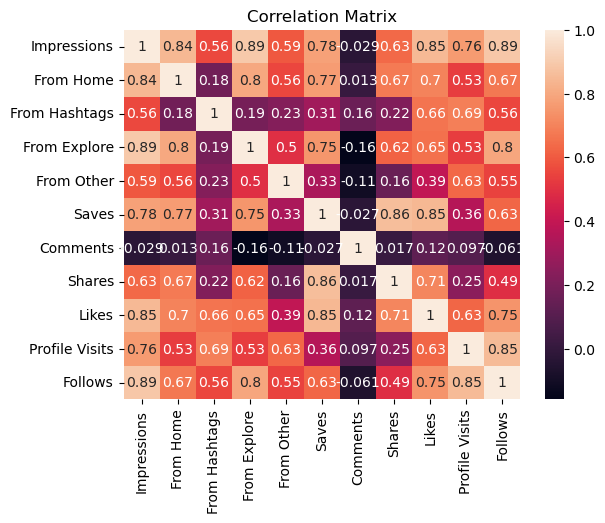

In [15]:
correlation = df.corr(numeric_only = True)
print(correlation["Impressions"].sort_values(ascending=False))
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
conversion_rate = (df["Follows"].sum()/df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


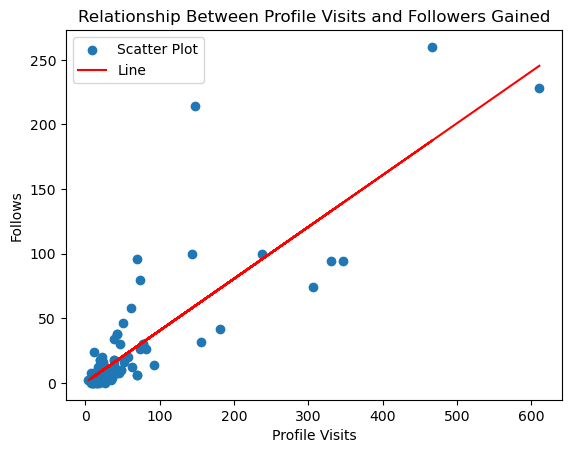

In [17]:
lr = LinearRegression()
lr.fit(df[["Profile Visits"]], df["Follows"])
plt.scatter(df["Profile Visits"], df["Follows"], label="Scatter Plot")
plt.title("Relationship Between Profile Visits and Followers Gained")
plt.xlabel("Profile Visits")
plt.ylabel("Follows")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Profile Visits"], m * df["Profile Visits"] + c, color="red", label="Line")

plt.legend()
plt.show()

In [18]:
X = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Approximate Accuracy: {accuracy:.2f}%")



Random Forest Model:
Mean Squared Error: 4315729.410029166
R-squared: 0.8888779704900795
Approximate Accuracy: 88.89%


In [40]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Regressor Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("R-squared:", r2_score(y_test, y_pred_xgb))

r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Approximate Accuracy: {accuracy:.2f}%")





XGBoost Regressor Model:
Mean Squared Error: 1206222.625
R-squared: 0.9689419865608215
Approximate Accuracy: 88.89%


In [33]:
cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("\nCatBoost Regressor Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_cat))
print("R-squared:", r2_score(y_test, y_pred_cat))

r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Approximate Accuracy: {accuracy:.2f}%")



CatBoost Regressor Model:
Mean Squared Error: 9853795.430629995
R-squared: 0.7462830398767317
Approximate Accuracy: 88.89%
